In [217]:
import numpy as np
from src.utils.utils import *
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150

In [218]:
data_engs = np.load("data/conditionalMADE-data/100-10mus/train_10mus-engs.npy")[:, 0]

In [219]:
neigh, coup, len_neigh = get_couplings(10, "data/couplings/100.txt")
samples = np.load("sample-100000_size-101_2023-11-02_12-38-05.npz")
samples = samples["sample"]

engs = []
for sample in samples:
    engs.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/100)

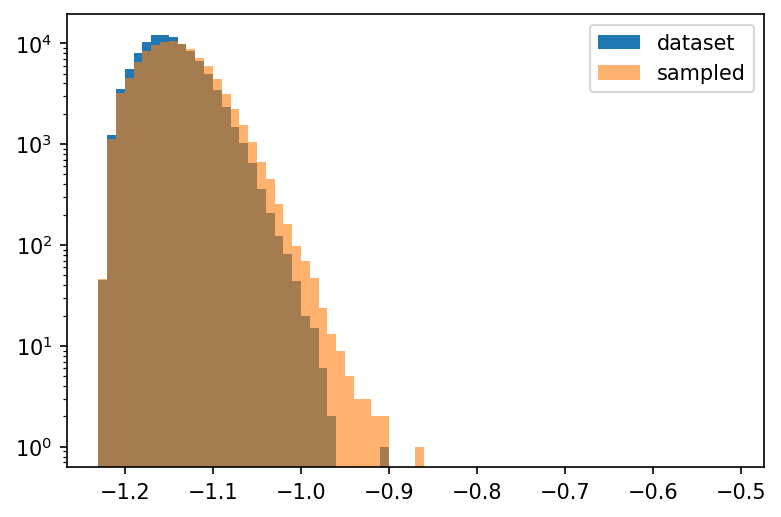

In [220]:
binss = np.arange(-1.23, -0.5, 0.01)
plt.hist(data_engs, bins=binss, label="dataset")
plt.hist(engs, bins=binss, label="sampled", alpha=.6)
plt.yscale("log")
plt.legend()
plt.show()

In [221]:
print(f"engs mean: {data_engs.mean()}")
print(f"engs std: {data_engs.std()}")

engs mean: -1.1474951860175389
engs std: 0.034732275935319


In [222]:
np.mean(engs)

-1.140816790273113